In [1]:
import pandas as pd
import datetime
from datetime import timedelta
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel("allapptslinac2010-2020.xlsx")
#df.sort_values(by=['MRN','ApptDtTm'], inplace=True)
df.head()

,MRN,TxUnit,ApptStatus,Duration,ApptDate,ApptTime_o,ApptTime_i,ApptTime
0,99.0,WV16,NaN,30.0,2019-08-13,14:50:00,14:50:00,14:50:00
1,2918.0,SA04,C,15.0,2015-12-28,19:15:00,19:15:00,19:15:00
2,2918.0,WA15,FC,15.0,2015-12-29,14:20:00,14:20:00,14:20:00
3,5723.0,NA10,"SC,S",30.0,2013-08-07,11:10:00,11:10:00,11:10:00
4,5723.0,NA10,C,15.0,2013-08-08,8:45,08:45:00,08:45:00


In [3]:
df.shape

(561578, 8)

In [4]:
#df['Date']=df["ApptDtTm"].dt.date
#df['Time']=df['ApptDtTm'].dt.time

In [4]:
df=df[df['TxUnit'].notnull()]
df=df[df['MRN'].notnull()]
df.shape

(561572, 8)

In [83]:
df['TxUnit'].unique()

array(['SA04', 'NA09', 'EA05', 'EV06', 'WA17', 'NA12', 'SV01', 'SV03',
       'NA10', 'WA15', 'EA08', 'EA07', 'SV02', 'WV16', 'NA11', 'WU14'],
      dtype=object)

In [5]:
df_2019 = df[df['ApptDate'].dt.year == 2019]
df_dailymins = df_2019.groupby(['ApptDate','TxUnit'])['Duration'].sum().reset_index()

In [123]:
df_dailymins.groupby(['TxUnit']).mean()

,Duration
TxUnit,
EA05,538.770492
EA07,600.620000
EA08,586.821705
EV06,467.904564
NA09,520.443548
NA10,525.201613
NA11,600.995261
NA12,599.143426
SA04,588.685259


In [105]:
# Earliest start time and lateness end time for each treatment unit
linac_schedule={}
for i in df_2019['TxUnit'].unique():
    #print(i)
    early = df[df['TxUnit']==i]['ApptTime'].min()
    late = df[df['TxUnit']==i]['ApptTime'].max()
    linac_schedule[i] = [early, late]

#df_se = pd.DataFrame(time_list, columns=['Unit','earliest','latest'])
#df_se
linac_schedule

{'EV06': [datetime.time(2, 30), datetime.time(23, 0)],
 'EA05': [datetime.time(7, 20), datetime.time(23, 0)],
 'EA07': [datetime.time(7, 30), datetime.time(23, 55)],
 'WA17': [datetime.time(7, 30), datetime.time(23, 50)],
 'WV16': [datetime.time(7, 55), datetime.time(20, 35)],
 'NA10': [datetime.time(7, 30), datetime.time(23, 0)],
 'NA09': [datetime.time(7, 45), datetime.time(23, 10)],
 'NA12': [datetime.time(7, 20), datetime.time(23, 35)],
 'SA04': [datetime.time(7, 0), datetime.time(23, 0)],
 'WA15': [datetime.time(7, 30), datetime.time(23, 0)],
 'NA11': [datetime.time(7, 35), datetime.time(21, 0)],
 'SV02': [datetime.time(7, 55), datetime.time(22, 55)],
 'EA08': [datetime.time(7, 0), datetime.time(23, 50)],
 'SV01': [datetime.time(7, 30), datetime.time(23, 25)],
 'SV03': [datetime.time(7, 0), datetime.time(23, 30)],
 'WU14': [datetime.time(9, 0), datetime.time(20, 25)]}

### Linac utilization
Assuming linac working hours 8am - 6pm (600 minutes)

Exceptions: 

WV16 8:00 - 14:00 (latest)15:40;

SV02 8:00 - 14:00  (latest)16:30;
           
WU14 9:35 - 15:00 ??????? usually in the afternoon

In [106]:
df_totalmins = df_2019.groupby(['ApptDate','TxUnit'], as_index=False)[['Duration']].sum()
df_totalmins.head()

,ApptDate,TxUnit,Duration
0,2019-01-01,EA08,110.0
1,2019-01-02,EA05,560.0
2,2019-01-02,EA07,515.0
3,2019-01-02,EA08,515.0
4,2019-01-02,EV06,615.0


In [129]:
df_totalmins.groupby(['TxUnit']).mean()

,Duration
TxUnit,
EA05,538.770492
EA07,600.620000
EA08,586.821705
EV06,467.904564
NA09,520.443548
NA10,525.201613
NA11,600.995261
NA12,599.143426
SA04,588.685259


In [107]:
# the min and max working hours for each unit (all)
unit_list=[]
for i in df_totalmins['TxUnit'].unique():
    #print(i)
    nummin = df_totalmins[df_totalmins['TxUnit']==i]['Duration'].min()
    nummax = df_totalmins[df_totalmins['TxUnit']==i]['Duration'].max()
    numavg = df_totalmins[df_totalmins['TxUnit']==i]['Duration'].mean()
    #nummod = df_totalmins[df_totalmins['TxUnit']==i]['Duration'].mode()
    unit_list.append([i, nummin, nummax, numavg])

df_unit = pd.DataFrame(unit_list, columns=['Unit','min','max','mean'])
df_unit 
# machines total working minutes

,Unit,min,max,mean
0,EA08,55.0,755.0,586.821705
1,EA05,20.0,760.0,538.770492
2,EA07,80.0,795.0,600.620000
3,EV06,15.0,645.0,467.904564
4,NA09,20.0,670.0,520.443548
5,NA10,130.0,815.0,525.201613
6,NA12,30.0,755.0,599.143426
7,SA04,20.0,720.0,588.685259
8,SV01,105.0,705.0,426.848980
9,SV02,45.0,550.0,253.318966


In [10]:
#filter to exclude exception units
df_min_fil = df_min[(df_min['TxUnt']!='WV16')& (df_min['TxUnt']!='SV02')& (df_min['TxUnt']!='WU14')]
df_min_fil.head()

,Date,TxUnt,ApptDuration
0,2020-01-01,WA17,75
1,2020-01-02,EA05,490
2,2020-01-02,EA07,525
3,2020-01-02,EA08,455
4,2020-01-02,EV06,450


In [11]:
df_min_fil.shape

(813, 3)

In [12]:
df_min_fil.to_excel("normal units working hours.xlsx")

In [13]:
# % of times when the linac utilization is smaller than 80%
p = 0.8
df_min_fil[df_min_fil['ApptDuration'] <= 620*p]

,Date,TxUnt,ApptDuration
0,2020-01-01,WA17,75
1,2020-01-02,EA05,490
3,2020-01-02,EA08,455
4,2020-01-02,EV06,450
5,2020-01-02,NA09,405
...,...,...,...
948,2020-03-31,EA07,470
950,2020-03-31,EV06,420
951,2020-03-31,NA09,55
956,2020-03-31,SV01,350


59% of times meet 90% linac capacity
32% of times meet 80% linac capacity

In [14]:
df_min_fil['Utilization'] = df_min_fil['ApptDuration']/620
df_min_fil.head()

<ipython-input-14-e8908e14c5da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_min_fil['Utilization'] = df_min_fil['ApptDuration']/620


,Date,TxUnt,ApptDuration,Utilization
0,2020-01-01,WA17,75,0.120968
1,2020-01-02,EA05,490,0.790323
2,2020-01-02,EA07,525,0.846774
3,2020-01-02,EA08,455,0.733871
4,2020-01-02,EV06,450,0.725806


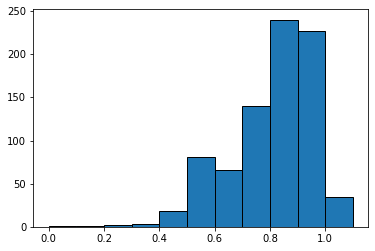

In [15]:
#histogram for linac utilisation
bins = np.arange(0,1.2,0.1)
plt.hist(df_min_fil['Utilization'], bins=bins, edgecolor='black')
plt.show()

## Trt Unit by SiteGroup

In [16]:
#daDF2['SiteGroup'].value_counts()

NameError: name 'daDF2' is not defined

In [17]:
daDF2 = pd.read_excel('daDF2.xlsx')
daDF_site = daDF2[['MRN','Si']]
daDF_site.drop_duplicates(inplace=True)

df_t = df.merge(daDF_site, on='MRN')

<ipython-input-17-95554389602c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daDF_site.drop_duplicates(inplace=True)


In [19]:
df_t.head()

,MRN,ApptDtTm,ApptDuration,TxUnt,ApptStatus,Date,Time,SiteGroup
0,48245,2020-03-04 17:30:00,30,NA12,SC,2020-03-04,17:30:00,Head & Neck
1,168487,2020-01-30 17:45:00,25,EV06,"SC,S",2020-01-30,17:45:00,Breast
2,168487,2020-01-31 15:30:00,15,EV06,C,2020-01-31,15:30:00,Breast
3,168487,2020-02-03 14:55:00,15,EV06,C,2020-02-03,14:55:00,Breast
4,168487,2020-02-04 14:45:00,15,EV06,C,2020-02-04,14:45:00,Breast


In [27]:
SiteUnit = dict()
for i in df_t['SiteGroup'].unique():
    SiteUnit[i]=np.unique(df_t[df_t['SiteGroup']==i]['TxUnt'].values)
SiteUnit

{'Head & Neck': array(['EA05', 'EA07', 'EA08', 'EV06', 'NA09', 'NA10', 'NA11', 'NA12',
        'SA04', 'SV01', 'SV02', 'SV03', 'WA15', 'WA17', 'WV16'],
       dtype=object),
 'Breast': array(['EA05', 'EA07', 'EA08', 'EV06', 'NA09', 'NA10', 'NA11', 'NA12',
        'SA04', 'WA15', 'WA17', 'WV16'], dtype=object),
 'GI Upper': array(['EA05', 'EA07', 'EA08', 'EV06', 'NA09', 'NA10', 'NA11', 'NA12',
        'SA04', 'SV01', 'WA15', 'WA17', 'WU14', 'WV16'], dtype=object),
 'Lung': array(['EA05', 'EA07', 'EA08', 'EV06', 'NA09', 'NA10', 'NA11', 'NA12',
        'SA04', 'SV01', 'SV02', 'SV03', 'WA15', 'WA17', 'WU14', 'WV16'],
       dtype=object),
 'Sarcoma': array(['EA08', 'EV06', 'NA10', 'NA11', 'NA12', 'SA04', 'WA15', 'WA17',
        'WV16'], dtype=object),
 'GU': array(['EA05', 'EA07', 'EA08', 'EV06', 'NA09', 'NA10', 'NA11', 'NA12',
        'SA04', 'SV01', 'SV02', 'WA15', 'WA17', 'WV16'], dtype=object),
 'Gynae': array(['EA05', 'EA07', 'EA08', 'EV06', 'NA09', 'NA10', 'NA11', 'NA12',
        'SA

In [28]:
UnitSite = dict()
for i in df_t['TxUnt'].unique():
    UnitSite[i]=np.unique(df_t[df_t['TxUnt']==i]['SiteGroup'].values)
UnitSite

{'NA12': array(['Breast', 'CNS', 'Endocrine', 'GI Lower', 'GI Upper', 'GU',
        'Gynae', 'Head & Neck', 'Lung', 'Lymphoma', 'Paediatrics',
        'Sarcoma', 'Skin'], dtype=object),
 'EV06': array(['Breast', 'CNS', 'Endocrine', 'Eye', 'GI Lower', 'GI Upper', 'GU',
        'Gynae', 'Head & Neck', 'Lung', 'Lymphoma', 'Sarcoma'],
       dtype=object),
 'EA08': array(['Breast', 'CNS', 'Eye', 'GI Upper', 'GU', 'Gynae', 'Head & Neck',
        'Lung', 'Sarcoma', 'Skin'], dtype=object),
 'NA11': array(['Breast', 'CNS', 'GI Lower', 'GI Upper', 'GU', 'Gynae',
        'Head & Neck', 'Lung', 'Lymphoma', 'Paediatrics', 'Sarcoma'],
       dtype=object),
 'EA05': array(['Breast', 'CNS', 'GI Upper', 'GU', 'Gynae', 'Head & Neck', 'Lung',
        'Skin'], dtype=object),
 'SA04': array(['Breast', 'CNS', 'Endocrine', 'Eye', 'GI Lower', 'GI Upper', 'GU',
        'Gynae', 'Head & Neck', 'Lung', 'Lymphoma', 'Sarcoma', 'Skin'],
       dtype=object),
 'NA10': array(['Breast', 'CNS', 'Endocrine', 'Eye', 'GI

In [79]:
unit_site_dict = {}
for u in UnitSite:
    sites=UnitSite[u]  
    unit_site_dict[u]=[1 if i in sites else 0 for i in df_t['SiteGroup'].unique()]
unit_site_dict    

{'NA12': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
 'EV06': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
 'EA08': [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0],
 'NA11': [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1],
 'EA05': [1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0],
 'SA04': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 'NA10': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
 'EA07': [1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0],
 'WA17': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1],
 'NA09': [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 'WA15': [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0],
 'SV03': [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
 'WV16': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
 'SV01': [1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
 'SV02': [1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
 'WU14': [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [80]:
df_t['SiteGroup'].unique()

array(['Head & Neck', 'Breast', 'GI Upper', 'Lung', 'Sarcoma', 'GU',
       'Gynae', 'Endocrine', 'CNS', 'Lymphoma', 'Eye', 'GI Lower', 'Skin',
       'Paediatrics'], dtype=object)

In [81]:
pd.DataFrame.from_dict(unit_site_dict, orient='index',
                       columns=df_t['SiteGroup'].unique())

,Head & Neck,Breast,GI Upper,Lung,Sarcoma,GU,Gynae,Endocrine,CNS,Lymphoma,Eye,GI Lower,Skin,Paediatrics
NA12,1,1,1,1,1,1,1,1,1,1,0,1,1,1
EV06,1,1,1,1,1,1,1,1,1,1,1,1,0,0
EA08,1,1,1,1,1,1,1,0,1,0,1,0,1,0
NA11,1,1,1,1,1,1,1,0,1,1,0,1,0,1
EA05,1,1,1,1,0,1,1,0,1,0,0,0,1,0
SA04,1,1,1,1,1,1,1,1,1,1,1,1,1,0
NA10,1,1,1,1,1,1,1,1,1,1,1,1,0,0
EA07,1,1,1,1,0,1,1,0,1,1,1,0,0,0
WA17,1,1,1,1,1,1,1,1,1,1,0,1,0,1
NA09,1,1,1,1,0,1,1,1,1,1,1,1,1,0


## LINACs monthly utilisation

In [146]:
linac_daily_cap={}
linac_daily_cap['SA04']=625
linac_daily_cap['EA05']=620
linac_daily_cap['EV06']=615
linac_daily_cap['EA07']=620
linac_daily_cap['EA08']=620
linac_daily_cap['NA09']=600
linac_daily_cap['NA10']=600
linac_daily_cap['NA11']=620
linac_daily_cap['NA12']=625
linac_daily_cap['SV01']=380
linac_daily_cap['SV03']=560
linac_daily_cap['SV02']=380
linac_daily_cap['WA15']=560
linac_daily_cap['WV16']=380
linac_daily_cap['WA17']=565
linac_daily_cap['WU14']=300 #assuming

In [149]:
df.head()

,MRN,ApptDtTm,ApptDuration,TxUnt,ApptStatus,Date,Time
15030,48245,2020-03-04 17:30:00,30,NA12,SC,2020-03-04,17:30:00
17522,58266,2020-03-16 11:45:00,30,EA05,"SC,S",2020-03-16,11:45:00
17946,58266,2020-03-17 14:35:00,20,EA05,C,2020-03-17,14:35:00
18266,58266,2020-03-18 14:20:00,20,EA05,C,2020-03-18,14:20:00
18475,58266,2020-03-19 11:10:00,20,EA05,C,2020-03-19,11:10:00


In [150]:
df['Month']=df.ApptDtTm.dt.month
monthly_unit = df[['ApptDuration','TxUnt','Month']].groupby(['Month','TxUnt']).sum()

In [151]:
monthly_unit = monthly_unit.reset_index()
monthly_unit.head()

,Month,TxUnt,ApptDuration
0,1,EA05,12550
1,1,EA07,12425
2,1,EA08,12110
3,1,EV06,11715
4,1,NA09,8370


In [119]:
num_days={}
for i in [1,2,3]:
    num_days[i] = len(df_t[df_t['Month']==i]['Date'].value_counts())

In [120]:
num_days

{1: 22, 2: 20, 3: 22}

In [152]:
linac_utilisation={}
for index, row in monthly_unit.iterrows():
    unit=row['TxUnt']
    duration=row['ApptDuration']
    month=row['Month']
    linac_utilisation[(month,unit)]=duration/(linac_daily_cap[unit]*num_days[month])

In [153]:
linac_utilisation

{(1, 'EA05'): 0.9200879765395894,
 (1, 'EA07'): 0.9109237536656891,
 (1, 'EA08'): 0.8878299120234604,
 (1, 'EV06'): 0.8658536585365854,
 (1, 'NA09'): 0.634090909090909,
 (1, 'NA10'): 0.6890151515151515,
 (1, 'NA11'): 0.8907624633431085,
 (1, 'NA12'): 0.8087272727272727,
 (1, 'SA04'): 0.9170909090909091,
 (1, 'SV01'): 0.9324162679425837,
 (1, 'SV02'): 0.5520334928229665,
 (1, 'SV03'): 1.0024350649350648,
 (1, 'WA15'): 0.7767857142857143,
 (1, 'WA17'): 0.8785197103781175,
 (1, 'WU14'): 0.07727272727272727,
 (1, 'WV16'): 0.9360047846889952,
 (2, 'EA05'): 0.8407258064516129,
 (2, 'EA07'): 0.8596774193548387,
 (2, 'EA08'): 0.8774193548387097,
 (2, 'EV06'): 0.8211382113821138,
 (2, 'NA09'): 0.5558333333333333,
 (2, 'NA10'): 0.7483333333333333,
 (2, 'NA11'): 0.875,
 (2, 'NA12'): 0.7992,
 (2, 'SA04'): 0.8856,
 (2, 'SV01'): 0.8842105263157894,
 (2, 'SV02'): 0.594078947368421,
 (2, 'SV03'): 0.9383928571428571,
 (2, 'WA15'): 0.9491071428571428,
 (2, 'WA17'): 0.8738938053097345,
 (2, 'WU14'): 0.08

# First appt duration vs. rest

In [10]:
MRNs = df_2019['MRN'].unique()

In [8]:
df_2019

,MRN,TxUnit,ApptStatus,Duration,ApptDate,ApptTime_o,ApptTime_i,ApptTime
0,99.0,WV16,NaN,30.0,2019-08-13,14:50:00,14:50:00,14:50:00
41,7287.0,WV16,"SC,P",30.0,2019-02-21,12:25:00,12:25:00,12:25:00
42,7287.0,EV06,OC,45.0,2019-02-27,13:45:00,13:45:00,13:45:00
43,7287.0,WV16,OC,30.0,2019-03-06,10:50:00,10:50:00,10:50:00
44,7287.0,WA15,X,30.0,2019-04-17,19:40:00,19:40:00,19:40:00
...,...,...,...,...,...,...,...,...
561541,6392009.0,EV06,C,15.0,2019-06-13,10:05:00,10:05:00,10:05:00
561542,6392009.0,EV06,FC,15.0,2019-06-14,10:05:00,10:05:00,10:05:00
561543,6392009.0,EV06,X,15.0,2019-06-17,20:00:00,20:00:00,20:00:00
561544,6392009.0,EV06,X,15.0,2019-06-18,20:00:00,20:00:00,20:00:00


In [16]:
df_temp = df_2019[df_2019['MRN']==7287].reset_index()
df_temp

,index,MRN,TxUnit,ApptStatus,Duration,ApptDate,ApptTime_o,ApptTime_i,ApptTime
0,41,7287.0,WV16,"SC,P",30.0,2019-02-21,12:25:00,12:25:00,12:25:00
1,42,7287.0,EV06,OC,45.0,2019-02-27,13:45:00,13:45:00,13:45:00
2,43,7287.0,WV16,OC,30.0,2019-03-06,10:50:00,10:50:00,10:50:00
3,44,7287.0,WA15,X,30.0,2019-04-17,19:40:00,19:40:00,19:40:00
4,45,7287.0,WA15,X,15.0,2019-04-24,12:00:00,12:00:00,12:00:00
5,46,7287.0,WA15,X,15.0,2019-05-08,12:15:00,12:15:00,12:15:00
6,47,7287.0,WA17,SC,45.0,2019-06-05,14:45:00,14:45:00,14:45:00
7,48,7287.0,WA17,C,45.0,2019-06-13,11:05:00,11:05:00,11:05:00
8,49,7287.0,WA17,FC,45.0,2019-06-26,10:25:00,10:25:00,10:25:00
9,50,7287.0,WA17,"SC,P",30.0,2019-08-06,10:55:00,10:55:00,10:55:00


In [19]:
list_diff=[]
for i in MRNs:
    df_temp = df_2019[df_2019['MRN']==i].reset_index()
    if len(df_temp)>1:
        diff = df_temp.loc[0,'Duration']-df_temp.loc[1,'Duration']
        list_diff.append(diff)

-15.0
10.0
15.0
15.0
10.0
0.0
15.0
10.0
20.0
20.0
10.0
15.0
15.0
0.0
10.0
5.0
15.0
0.0
15.0
-20.0
10.0
10.0
15.0
15.0
15.0
15.0
10.0
15.0
15.0
15.0
10.0
10.0
15.0
15.0
10.0
10.0
10.0
15.0
5.0
0.0
-20.0
0.0
15.0
10.0
15.0
25.0
15.0
-5.0
10.0
-5.0
15.0
15.0
10.0
15.0
10.0
0.0
-5.0
10.0
20.0
10.0
10.0
15.0
15.0
15.0
15.0
15.0
10.0
10.0
10.0
15.0
15.0
15.0
10.0
10.0
15.0
15.0
10.0
10.0
15.0
0.0
0.0
15.0
10.0
15.0
15.0
15.0
15.0
15.0
10.0
15.0
15.0
15.0
10.0
15.0
15.0
0.0
15.0
15.0
15.0
15.0
10.0
10.0
15.0
15.0
15.0
10.0
0.0
20.0
0.0
0.0
0.0
10.0
15.0
0.0
10.0
10.0
15.0
0.0
25.0
30.0
15.0
15.0
10.0
15.0
0.0
15.0
15.0
10.0
15.0
10.0
10.0
15.0
10.0
10.0
15.0
20.0
10.0
0.0
15.0
15.0
0.0
15.0
30.0
-45.0
15.0
0.0
15.0
10.0
5.0
10.0
10.0
15.0
15.0
10.0
10.0
15.0
15.0
15.0
15.0
10.0
10.0
10.0
10.0
-5.0
0.0
0.0
15.0
5.0
15.0
5.0
0.0
5.0
-30.0
15.0
10.0
10.0
0.0
15.0
10.0
5.0
15.0
5.0
15.0
0.0
0.0
10.0
15.0
15.0
10.0
-10.0
15.0
15.0
15.0
10.0
15.0
15.0
15.0
0.0
10.0
15.0
5.0
0.0
10.0
0.0
0.0
-15.0
0

15.0
0.0
0.0
15.0
15.0
15.0
10.0
15.0
15.0
15.0
0.0
15.0
15.0
-45.0
15.0
15.0
10.0
15.0
15.0
15.0
5.0
15.0
15.0
0.0
15.0
10.0
0.0
15.0
10.0
15.0
0.0
15.0
15.0
15.0
5.0
10.0
5.0
15.0
15.0
15.0
10.0
-15.0
0.0
5.0
15.0
15.0
10.0
15.0
0.0
5.0
15.0
15.0
15.0
15.0
10.0
-45.0
5.0
0.0
15.0
15.0
10.0
15.0
10.0
10.0
15.0
15.0
0.0
15.0
15.0
15.0
15.0
15.0
-45.0
10.0
15.0
15.0
15.0
0.0
15.0
15.0
5.0
10.0
10.0
10.0
15.0
-10.0
15.0
0.0
15.0
0.0
15.0
15.0
0.0
5.0
10.0
10.0
15.0
0.0
15.0
5.0
15.0
0.0
15.0
15.0
15.0
15.0
15.0
10.0
10.0
15.0
10.0
10.0
15.0
15.0
10.0
30.0
10.0
0.0
-25.0
5.0
15.0
15.0
0.0
15.0
10.0
15.0
15.0
20.0
10.0
15.0
0.0
10.0
10.0
20.0
15.0
30.0
10.0
15.0
10.0
15.0
10.0
10.0
0.0
0.0
10.0
15.0
0.0
15.0
15.0
10.0
0.0
0.0
10.0
15.0
15.0
15.0
10.0
10.0
10.0
15.0
10.0
10.0
15.0
-20.0
15.0
10.0
15.0
15.0
10.0
-15.0
10.0
0.0
15.0
15.0
0.0
10.0
10.0
15.0
15.0
15.0
0.0
10.0
0.0
0.0
15.0
10.0
15.0
15.0
15.0
15.0
15.0
10.0
5.0
15.0
10.0
5.0
10.0
10.0
15.0
15.0
15.0
-15.0
15.0
10.0
25.0
0.0
15.

0.0
0.0
5.0
0.0
10.0
15.0
0.0
0.0
25.0
0.0
15.0
20.0
10.0
15.0
25.0
10.0
15.0
-45.0
-20.0
15.0
15.0
15.0
15.0
0.0
0.0
0.0
0.0
0.0
15.0
10.0
5.0
0.0
15.0
0.0
15.0
15.0
0.0
10.0
0.0
15.0
0.0
15.0
10.0
-30.0
-45.0
15.0
10.0
15.0
15.0
0.0
0.0
15.0
15.0
0.0
15.0
15.0
0.0
0.0
15.0
10.0
-45.0
15.0
10.0
10.0
10.0
-15.0
0.0
15.0
5.0
0.0
15.0
-20.0
0.0
-45.0
15.0
10.0
15.0
0.0
0.0
10.0
-30.0
10.0
5.0
10.0
10.0
0.0
10.0
10.0
10.0
-45.0
0.0
15.0
15.0
10.0
15.0
10.0
15.0
10.0
0.0
0.0
15.0
0.0
15.0
0.0
0.0
15.0
0.0
15.0
10.0
0.0
15.0
15.0
10.0
15.0
15.0
15.0
15.0
15.0
20.0
15.0
0.0
0.0
15.0
0.0
15.0
0.0
15.0
15.0
15.0
10.0
20.0
10.0
0.0
15.0
0.0
10.0
15.0
10.0
15.0
-45.0
15.0
10.0
15.0
15.0
15.0
15.0
0.0
15.0
15.0
15.0
0.0
0.0
15.0
-15.0
15.0
10.0
15.0
0.0
25.0
-45.0
10.0
0.0
15.0
15.0
-75.0
10.0
15.0
15.0
0.0
15.0
15.0
10.0
10.0
15.0
15.0
15.0
-45.0
10.0
15.0
10.0
15.0
15.0
15.0
0.0
10.0
-45.0
0.0
10.0
15.0
15.0
15.0
15.0
5.0
0.0
10.0
-60.0
25.0
-45.0
20.0
0.0
0.0
10.0
15.0
-45.0
0.0
0.0
15.0
15.0


In [26]:
from statistics import mode
from statistics import mean
mode(list_diff)

15.0

In [27]:
mean(list_diff)

7.637380191693291